In [1]:
import pandas as pd
csv_files = ['Traffic_Data_11.csv', 'Traffic_Data_22.csv','Traffic_Data_33.csv','Traffic_Data_44.csv' ]
# Read and concatenate the CSV files into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin
0,2024-05-08T13:00:08.694-04:00,MTA NYCT_9744,40.830660,-73.947451,MIDTOWN 32 ST & 5 AV via BWAY 5 AV,MTA_403835
1,2024-05-08T13:00:08.694-04:00,MTA NYCT_9761,40.746873,-73.984858,MIDTOWN 32 ST & 5 AV via BWAY 5 AV,MTA_403835
2,2024-05-08T13:00:08.694-04:00,MTA NYCT_9871,40.793413,-73.949644,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353
3,2024-05-08T13:00:08.694-04:00,MTA NYCT_9900,40.826733,-73.950111,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353
4,2024-05-08T13:00:08.694-04:00,MTA NYCT_9444,40.772705,-73.964747,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353
...,...,...,...,...,...,...
51310,2024-05-08T21:01:21.938-04:00,MTA NYCT_9805,40.782608,-73.980641,WEST HARLEM 129 ST via BROADWAY,MTA_405374
51311,2024-05-08T21:01:21.938-04:00,MTA NYCT_9909,40.757772,-73.985608,41 ST via BROADWAY/7 AV,MTA_403942
51312,2024-05-08T21:01:21.938-04:00,MTA NYCT_9841,40.788551,-73.976394,41 ST via BROADWAY/7 AV,MTA_403942
51313,2024-05-08T21:01:21.938-04:00,MTA NYCT_9886,40.812277,-73.960922,41 ST via BROADWAY/7 AV,MTA_403942


In [2]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Calculate haversine distance
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

df=df.drop_duplicates(subset=['ResponseTimestamp','VehicleRef'])
df['ResponseTimestamp'] = pd.to_datetime(df['ResponseTimestamp'])

df.sort_values(by=['VehicleRef', 'ResponseTimestamp'], inplace=True)
df['lat_diff'] = df.groupby('VehicleRef')['Latitude'].diff()
df['lon_diff'] = df.groupby('VehicleRef')['Longitude'].diff()
df['time_diff'] = df.groupby('VehicleRef')['ResponseTimestamp'].diff().dt.total_seconds() / 3600 #in hours
df['distance_km'] = df.apply(lambda x: haversine(x['Latitude'] - x['lat_diff'], x['Longitude'] - x['lon_diff'], x['Latitude'], x['Longitude']) if not pd.isna(x['lat_diff']) else np.nan, axis=1)

df['velocity_kmh'] = df['distance_km'] / df['time_diff']
df['velocity_kmh'] = df['velocity_kmh'].replace([np.inf, -np.inf], np.nan).fillna(0)
df

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh
13771,2024-05-08 15:10:08.755000-04:00,MTA NYCT_4669,40.809509,-73.959084,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,NaN,NaN,NaN,NaN,0.000000
13842,2024-05-08 15:10:41.125000-04:00,MTA NYCT_4669,40.809469,-73.959115,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.000040,-0.000031,0.008992,0.005157,0.573480
13913,2024-05-08 15:11:13.295000-04:00,MTA NYCT_4669,40.808220,-73.960022,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.001249,-0.000907,0.008936,0.158479,17.734629
13983,2024-05-08 15:11:45.587000-04:00,MTA NYCT_4669,40.807634,-73.960472,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.000586,-0.000450,0.008970,0.075368,8.402188
14052,2024-05-08 15:12:17.920000-04:00,MTA NYCT_4669,40.805727,-73.961839,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.001907,-0.001367,0.008981,0.241251,26.861238
...,...,...,...,...,...,...,...,...,...,...,...
51193,2024-05-08 20:59:16.029000-04:00,MTA NYCT_9909,40.760177,-73.983874,41 ST via BROADWAY/7 AV,MTA_403942,-0.000570,-0.000423,0.008759,0.072708,8.300511
51224,2024-05-08 20:59:47.419000-04:00,MTA NYCT_9909,40.760068,-73.983958,41 ST via BROADWAY/7 AV,MTA_403942,-0.000109,-0.000084,0.008719,0.014034,1.609510
51254,2024-05-08 21:00:18.785000-04:00,MTA NYCT_9909,40.759321,-73.984506,41 ST via BROADWAY/7 AV,MTA_403942,-0.000747,-0.000548,0.008713,0.095025,10.906373
51282,2024-05-08 21:00:50.386000-04:00,MTA NYCT_9909,40.758389,-73.985161,41 ST via BROADWAY/7 AV,MTA_403942,-0.000932,-0.000655,0.008778,0.117403,13.374601


In [3]:
#120 st and Amsterdam Ave
# Define your latitude and longitude boundaries
latitude_min = 40.8087307
latitude_max = 40.8099932
longitude_min = -73.9596069
longitude_max = -73.9586886

# Filter the DataFrame for rows where latitude and longitude are within the boundaries
df_1 = df[
    (df['Latitude'] >= latitude_min) &
    (df['Latitude'] <= latitude_max) &
    (df['Longitude'] >= longitude_min) &
    (df['Longitude'] <= longitude_max)
]
df_1

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh
13771,2024-05-08 15:10:08.755000-04:00,MTA NYCT_4669,40.809509,-73.959084,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,NaN,NaN,NaN,NaN,0.000000
13842,2024-05-08 15:10:41.125000-04:00,MTA NYCT_4669,40.809469,-73.959115,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.000040,-0.000031,0.008992,0.005157,0.573480
33919,2024-05-08 17:49:47.234000-04:00,MTA NYCT_4669,40.809538,-73.959061,RIVERBANK 145 ST via 10 AV,MTA_401393,0.003957,0.002887,0.009017,0.502632,55.741355
33995,2024-05-08 17:50:19.457000-04:00,MTA NYCT_4669,40.809692,-73.958944,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000154,0.000117,0.008951,0.019753,2.206871
17240,2024-05-08 15:36:37.094000-04:00,MTA NYCT_4672,40.809528,-73.959069,RIVERBANK 145 ST via 10 AV,MTA_401393,0.001276,0.000930,0.009296,0.162042,17.430662
...,...,...,...,...,...,...,...,...,...,...,...
49564,2024-05-08 20:34:56.847000-04:00,MTA NYCT_9854,40.809788,-73.958872,RIVERBANK 145 ST via 10 AV,MTA_401393,0.006828,0.004996,0.087981,0.867904,9.864637
8886,2024-05-08 14:28:22.240000-04:00,MTA NYCT_9902,40.809126,-73.959369,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.001620,-0.001185,0.010497,0.205901,19.614809
29714,2024-05-08 17:15:47.986000-04:00,MTA NYCT_9902,40.808855,-73.959566,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000322,0.000232,0.009009,0.040783,4.526675
29776,2024-05-08 17:16:20.586000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000540,0.000395,0.009056,0.068634,7.579200


In [4]:
# Define your latitude and longitude boundaries
latitude_min = 40.8086800
latitude_max = 40.8104711
longitude_min = -73.9618563
longitude_max = -73.9575801

# Filter the DataFrame for rows where latitude and longitude are within the boundaries
df_2 = df[
    (df['Latitude'] >= latitude_min) &
    (df['Latitude'] <= latitude_max) &
    (df['Longitude'] >= longitude_min) &
    (df['Longitude'] <= longitude_max)
]
df_2

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh
13771,2024-05-08 15:10:08.755000-04:00,MTA NYCT_4669,40.809509,-73.959084,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,NaN,NaN,NaN,NaN,0.000000
13842,2024-05-08 15:10:41.125000-04:00,MTA NYCT_4669,40.809469,-73.959115,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.000040,-0.000031,0.008992,0.005157,0.573480
33919,2024-05-08 17:49:47.234000-04:00,MTA NYCT_4669,40.809538,-73.959061,RIVERBANK 145 ST via 10 AV,MTA_401393,0.003957,0.002887,0.009017,0.502632,55.741355
33995,2024-05-08 17:50:19.457000-04:00,MTA NYCT_4669,40.809692,-73.958944,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000154,0.000117,0.008951,0.019753,2.206871
34060,2024-05-08 17:50:51.960000-04:00,MTA NYCT_4669,40.810068,-73.958660,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000376,0.000284,0.009029,0.048159,5.334074
...,...,...,...,...,...,...,...,...,...,...,...
29714,2024-05-08 17:15:47.986000-04:00,MTA NYCT_9902,40.808855,-73.959566,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000322,0.000232,0.009009,0.040783,4.526675
29776,2024-05-08 17:16:20.586000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000540,0.000395,0.009056,0.068634,7.579200
29847,2024-05-08 17:16:52.954000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000000,0.000000,0.008991,0.000000,0.000000
29924,2024-05-08 17:17:25.232000-04:00,MTA NYCT_9902,40.810099,-73.958637,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000704,0.000534,0.008966,0.090265,10.067348


In [5]:
frames = [df_1, df_2]

df_3 = pd.concat(frames)
df_3['velocity_kms'] = df_3['velocity_kmh'] / 3600
df_3

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh,velocity_kms
13771,2024-05-08 15:10:08.755000-04:00,MTA NYCT_4669,40.809509,-73.959084,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,NaN,NaN,NaN,NaN,0.000000,0.000000
13842,2024-05-08 15:10:41.125000-04:00,MTA NYCT_4669,40.809469,-73.959115,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.000040,-0.000031,0.008992,0.005157,0.573480,0.000159
33919,2024-05-08 17:49:47.234000-04:00,MTA NYCT_4669,40.809538,-73.959061,RIVERBANK 145 ST via 10 AV,MTA_401393,0.003957,0.002887,0.009017,0.502632,55.741355,0.015484
33995,2024-05-08 17:50:19.457000-04:00,MTA NYCT_4669,40.809692,-73.958944,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000154,0.000117,0.008951,0.019753,2.206871,0.000613
17240,2024-05-08 15:36:37.094000-04:00,MTA NYCT_4672,40.809528,-73.959069,RIVERBANK 145 ST via 10 AV,MTA_401393,0.001276,0.000930,0.009296,0.162042,17.430662,0.004842
...,...,...,...,...,...,...,...,...,...,...,...,...
29714,2024-05-08 17:15:47.986000-04:00,MTA NYCT_9902,40.808855,-73.959566,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000322,0.000232,0.009009,0.040783,4.526675,0.001257
29776,2024-05-08 17:16:20.586000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000540,0.000395,0.009056,0.068634,7.579200,0.002105
29847,2024-05-08 17:16:52.954000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000000,0.000000,0.008991,0.000000,0.000000,0.000000
29924,2024-05-08 17:17:25.232000-04:00,MTA NYCT_9902,40.810099,-73.958637,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000704,0.000534,0.008966,0.090265,10.067348,0.002796


In [7]:
df_3['ResponseTimestamp'] = pd.to_datetime(df_3['ResponseTimestamp'])
df_4 = df_3[df_3['ResponseTimestamp'].dt.date == pd.to_datetime('2024-05-08').date()]
reference_time = df_4['ResponseTimestamp'].iloc[2]
df_4['time_seconds'] = (df_4['ResponseTimestamp'] - reference_time).dt.total_seconds()
df_5 = df_4.drop(df_4.index[:2])
df_5

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh,velocity_kms,time_seconds
33919,2024-05-08 17:49:47.234000-04:00,MTA NYCT_4669,40.809538,-73.959061,RIVERBANK 145 ST via 10 AV,MTA_401393,0.003957,0.002887,0.009017,0.502632,55.741355,0.015484,0.000
33995,2024-05-08 17:50:19.457000-04:00,MTA NYCT_4669,40.809692,-73.958944,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000154,0.000117,0.008951,0.019753,2.206871,0.000613,32.223
17240,2024-05-08 15:36:37.094000-04:00,MTA NYCT_4672,40.809528,-73.959069,RIVERBANK 145 ST via 10 AV,MTA_401393,0.001276,0.000930,0.009296,0.162042,17.430662,0.004842,-7990.140
17328,2024-05-08 15:37:09.460000-04:00,MTA NYCT_4672,40.809624,-73.958996,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000096,0.000073,0.008991,0.012316,1.369937,0.000381,-7957.774
17399,2024-05-08 15:37:41.824000-04:00,MTA NYCT_4672,40.809747,-73.958902,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000123,0.000094,0.008990,0.015800,1.757532,0.000488,-7925.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29714,2024-05-08 17:15:47.986000-04:00,MTA NYCT_9902,40.808855,-73.959566,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000322,0.000232,0.009009,0.040783,4.526675,0.001257,-2039.248
29776,2024-05-08 17:16:20.586000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000540,0.000395,0.009056,0.068634,7.579200,0.002105,-2006.648
29847,2024-05-08 17:16:52.954000-04:00,MTA NYCT_9902,40.809395,-73.959171,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000000,0.000000,0.008991,0.000000,0.000000,0.000000,-1974.280
29924,2024-05-08 17:17:25.232000-04:00,MTA NYCT_9902,40.810099,-73.958637,RIVERBANK 145 ST via 10 AV,MTA_401393,0.000704,0.000534,0.008966,0.090265,10.067348,0.002796,-1942.002


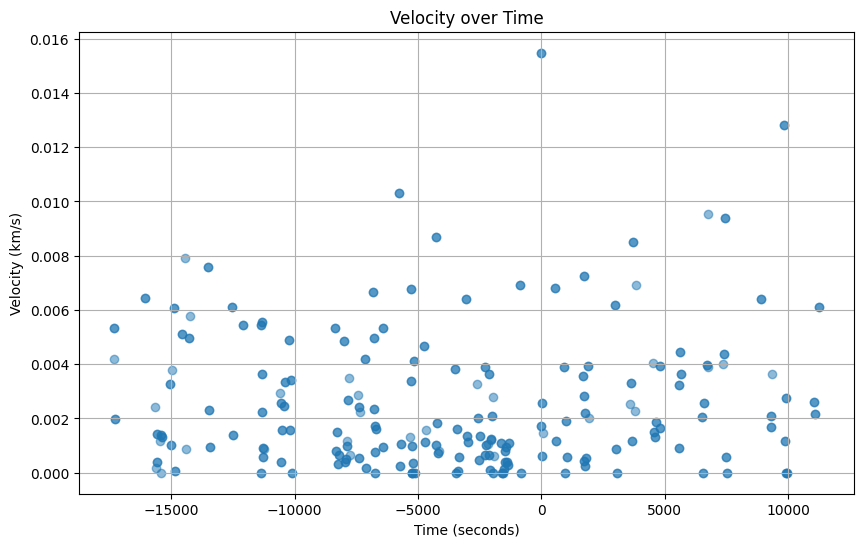

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_5['time_seconds'], df_5['velocity_kms'], alpha=0.5)
plt.title('Velocity over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/s)')

plt.grid(True)
plt.show()

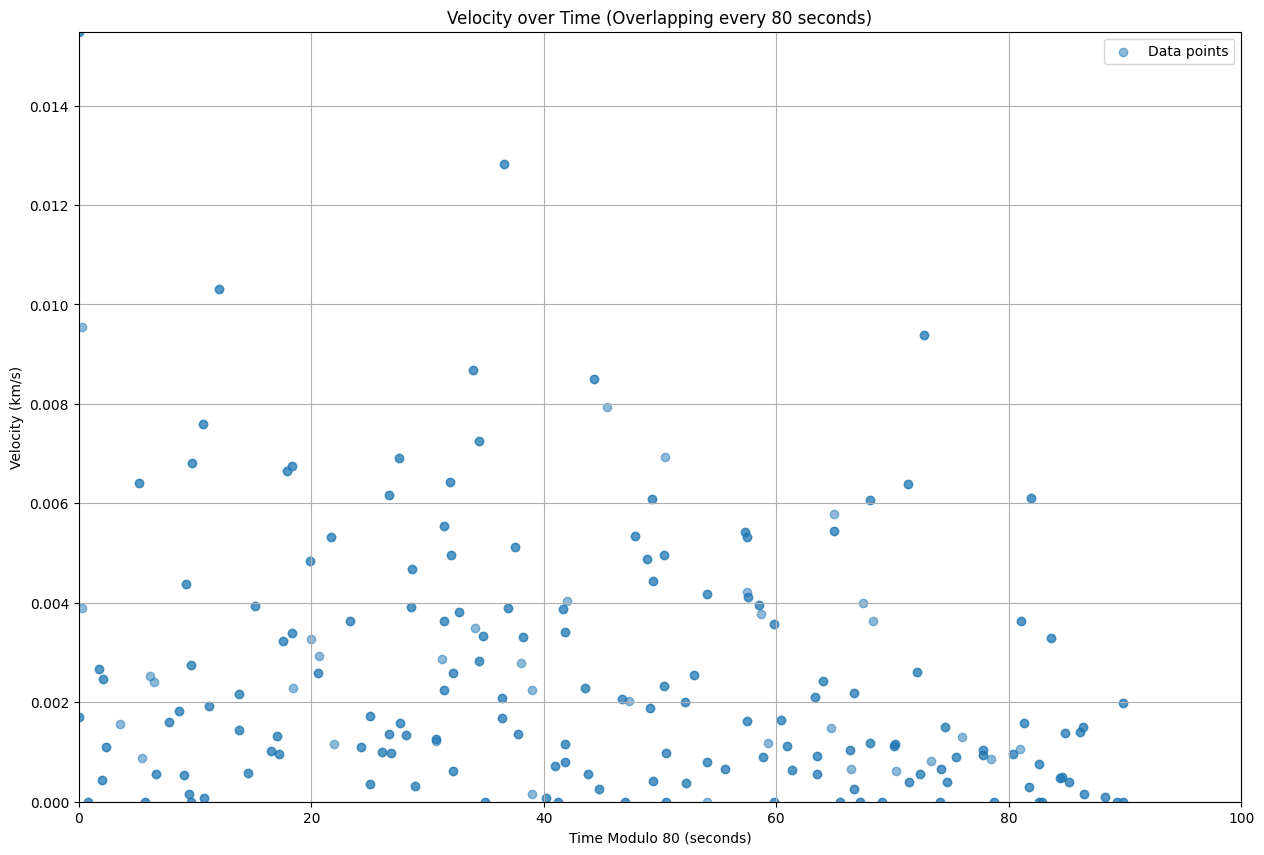

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


    # Apply modulo operation to wrap time around every period_T seconds
df_5['time_modulo'] = df_5['time_seconds'] % 90

    # Perform a linear regression on the wrapped data
m, b = np.polyfit(df_5['time_modulo'], df_5['velocity_kms'], 1)

    # Create a sequence of 1000 evenly spaced numbers from 0 to period_T for plotting the trend line
x = np.linspace(0, 3600, 1000)
y = m * x + b

    # Plotting
plt.figure(figsize=(15, 10))
plt.scatter(df_5['time_modulo'], df_5['velocity_kms'], alpha=0.5, label='Data points')

plt.title(f'Velocity over Time (Overlapping every {80} seconds)')
plt.xlabel(f'Time Modulo {80} (seconds)')
plt.ylabel('Velocity (km/s)')
plt.xlim(0, 100)  # Set x-axis limit to period_T seconds
plt.ylim(0, df_5['velocity_kms'].max())  # Set y-axis limit based on maximum velocity
plt.grid(True)
plt.legend()
plt.show()




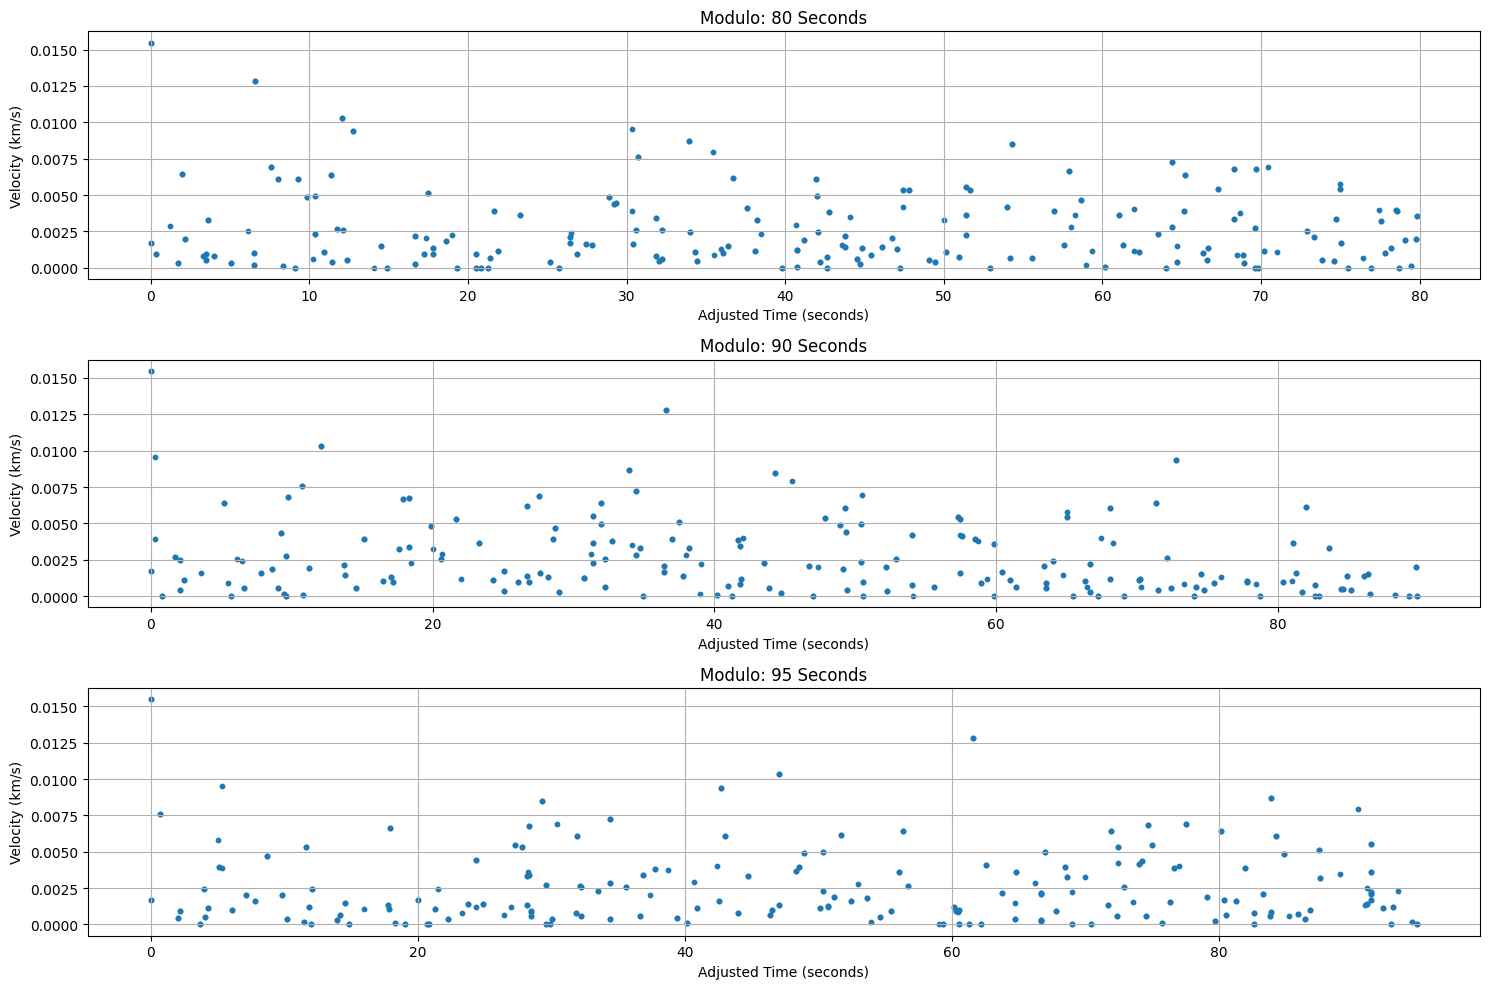

In [13]:
import matplotlib.pyplot as plt

def plot_modulo_adjusted_time(df, modulo_values):
    plt.figure(figsize=(15, 10))

    for i, mod in enumerate(modulo_values, 1):
        adjusted_time = df['time_seconds'] % mod
        plt.subplot(len(modulo_values), 1, i)
        plt.scatter(adjusted_time, df['velocity_kms'], s=10)
        plt.title(f'Modulo: {mod} Seconds')
        plt.xlabel('Adjusted Time (seconds)')
        plt.ylabel('Velocity (km/s)')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example modulo values to test
modulo_values = [80, 90, 95]  # 1 hour, 1 day, 1 week
plot_modulo_adjusted_time(df_5, modulo_values)


In [16]:

#120 st and Broadway
# Define your latitude and longitude boundaries
latitude_min = 40.8093299
latitude_max = 40.8109522
longitude_min = -73.9630049
longitude_max = -73.9591439

# Filter the DataFrame for rows where latitude and longitude are within the boundaries
df_11 = df[
    (df['Latitude'] >= latitude_min) &
    (df['Latitude'] <= latitude_max) &
    (df['Longitude'] >= longitude_min) &
    (df['Longitude'] <= longitude_max)
]
df_11

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh
40922,2024-05-08 18:52:01.519000-04:00,MTA NYCT_4672,40.809417,-73.959154,RIVERBANK 145 ST via 10 AV,MTA_401393,0.002149,0.001586,0.008946,0.273713,30.596669
4621,2024-05-08 13:47:24.734000-04:00,MTA NYCT_4691,40.809409,-73.959161,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.001357,-0.000992,0.009356,0.172448,18.432737
10719,2024-05-08 14:45:02.486000-04:00,MTA NYCT_4699,40.809833,-73.962439,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.001918,0.001411,0.008913,0.244105,27.389076
10785,2024-05-08 14:45:34.660000-04:00,MTA NYCT_4699,40.809814,-73.962453,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,-0.000019,-0.000014,0.008937,0.002419,0.270672
10837,2024-05-08 14:46:06.812000-04:00,MTA NYCT_4699,40.810328,-73.962075,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000514,0.000378,0.008931,0.065412,7.324006
...,...,...,...,...,...,...,...,...,...,...,...
33012,2024-05-08 17:42:15.426000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,0.000000,0.000000,0.008901,0.000000,0.000000
33076,2024-05-08 17:42:47.716000-04:00,MTA NYCT_9909,40.810428,-73.962257,41 ST via BROADWAY/7 AV,MTA_403942,-0.000347,-0.000258,0.008969,0.044275,4.936167
44769,2024-05-08 19:32:42.941000-04:00,MTA NYCT_9909,40.810832,-73.961700,WEST HARLEM 129 ST via BROADWAY,MTA_405374,0.001737,0.001283,0.008986,0.221280,24.626153
44817,2024-05-08 19:33:14.800000-04:00,MTA NYCT_9909,40.810871,-73.961671,WEST HARLEM 129 ST via BROADWAY,MTA_405374,0.000039,0.000029,0.008850,0.004976,0.562304


In [17]:
# Define your latitude and longitude boundaries
latitude_min = 40.8099699
latitude_max = 40.8112082
longitude_min = -73.9624788
longitude_max = -73.9615675

# Filter the DataFrame for rows where latitude and longitude are within the boundaries
df_22 = df[
    (df['Latitude'] >= latitude_min) &
    (df['Latitude'] <= latitude_max) &
    (df['Longitude'] >= longitude_min) &
    (df['Longitude'] <= longitude_max)
]
df_22

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh
10837,2024-05-08 14:46:06.812000-04:00,MTA NYCT_4699,40.810328,-73.962075,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000514,0.000378,0.008931,0.065412,7.324006
10919,2024-05-08 14:46:38.862000-04:00,MTA NYCT_4699,40.810969,-73.961598,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000641,0.000477,0.008903,0.081804,9.188560
19499,2024-05-08 15:53:54.445000-04:00,MTA NYCT_9417,40.810584,-73.961885,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000965,0.000712,0.008942,0.122901,13.743490
19570,2024-05-08 15:54:26.761000-04:00,MTA NYCT_9417,40.810874,-73.961669,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000290,0.000216,0.008977,0.037018,4.123757
33631,2024-05-08 17:47:36.779000-04:00,MTA NYCT_9417,40.811061,-73.961799,MIDTOWN 32 ST & 5 AV via BWAY 5 AV,MTA_403835,-0.000424,-0.000308,0.008995,0.053803,5.981200
...,...,...,...,...,...,...,...,...,...,...,...
32950,2024-05-08 17:41:43.384000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,-0.000975,-0.000697,0.008962,0.123267,13.754061
33012,2024-05-08 17:42:15.426000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,0.000000,0.000000,0.008901,0.000000,0.000000
33076,2024-05-08 17:42:47.716000-04:00,MTA NYCT_9909,40.810428,-73.962257,41 ST via BROADWAY/7 AV,MTA_403942,-0.000347,-0.000258,0.008969,0.044275,4.936167
44769,2024-05-08 19:32:42.941000-04:00,MTA NYCT_9909,40.810832,-73.961700,WEST HARLEM 129 ST via BROADWAY,MTA_405374,0.001737,0.001283,0.008986,0.221280,24.626153


In [18]:
frames = [df_11, df_22]

df_33 = pd.concat(frames)
df_33['velocity_kms'] = df_33['velocity_kmh'] / 3600
df_33

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh,velocity_kms
40922,2024-05-08 18:52:01.519000-04:00,MTA NYCT_4672,40.809417,-73.959154,RIVERBANK 145 ST via 10 AV,MTA_401393,0.002149,0.001586,0.008946,0.273713,30.596669,0.008499
4621,2024-05-08 13:47:24.734000-04:00,MTA NYCT_4691,40.809409,-73.959161,WEST VILLAGE ABINGDON SQ via 9 AV,MTA_803195,-0.001357,-0.000992,0.009356,0.172448,18.432737,0.005120
10719,2024-05-08 14:45:02.486000-04:00,MTA NYCT_4699,40.809833,-73.962439,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.001918,0.001411,0.008913,0.244105,27.389076,0.007608
10785,2024-05-08 14:45:34.660000-04:00,MTA NYCT_4699,40.809814,-73.962453,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,-0.000019,-0.000014,0.008937,0.002419,0.270672,0.000075
10837,2024-05-08 14:46:06.812000-04:00,MTA NYCT_4699,40.810328,-73.962075,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000514,0.000378,0.008931,0.065412,7.324006,0.002034
...,...,...,...,...,...,...,...,...,...,...,...,...
32950,2024-05-08 17:41:43.384000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,-0.000975,-0.000697,0.008962,0.123267,13.754061,0.003821
33012,2024-05-08 17:42:15.426000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,0.000000,0.000000,0.008901,0.000000,0.000000,0.000000
33076,2024-05-08 17:42:47.716000-04:00,MTA NYCT_9909,40.810428,-73.962257,41 ST via BROADWAY/7 AV,MTA_403942,-0.000347,-0.000258,0.008969,0.044275,4.936167,0.001371
44769,2024-05-08 19:32:42.941000-04:00,MTA NYCT_9909,40.810832,-73.961700,WEST HARLEM 129 ST via BROADWAY,MTA_405374,0.001737,0.001283,0.008986,0.221280,24.626153,0.006841


In [20]:
df_33['ResponseTimestamp'] = pd.to_datetime(df_33['ResponseTimestamp'])
df_44 = df_33[df_33['ResponseTimestamp'].dt.date == pd.to_datetime('2024-05-08').date()]
reference_time = df_44['ResponseTimestamp'].iloc[2]
df_44['time_seconds'] = (df_44['ResponseTimestamp'] - reference_time).dt.total_seconds()
df_55 = df_44.drop(df_44.index[:2])
df_55

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,lat_diff,lon_diff,time_diff,distance_km,velocity_kmh,velocity_kms,time_seconds
10719,2024-05-08 14:45:02.486000-04:00,MTA NYCT_4699,40.809833,-73.962439,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.001918,0.001411,0.008913,0.244105,27.389076,0.007608,0.000
10785,2024-05-08 14:45:34.660000-04:00,MTA NYCT_4699,40.809814,-73.962453,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,-0.000019,-0.000014,0.008937,0.002419,0.270672,0.000075,32.174
10837,2024-05-08 14:46:06.812000-04:00,MTA NYCT_4699,40.810328,-73.962075,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000514,0.000378,0.008931,0.065412,7.324006,0.002034,64.326
19351,2024-05-08 15:52:49.974000-04:00,MTA NYCT_9417,40.809428,-73.962737,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.001024,0.000755,0.009006,0.130394,14.477952,0.004022,4067.488
19423,2024-05-08 15:53:22.252000-04:00,MTA NYCT_9417,40.809619,-73.962597,WSHNGTN HTS CLOISTRS via MADISN via BWAY,MTA_400353,0.000191,0.000140,0.008966,0.024288,2.708836,0.000752,4099.766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32950,2024-05-08 17:41:43.384000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,-0.000975,-0.000697,0.008962,0.123267,13.754061,0.003821,10600.898
33012,2024-05-08 17:42:15.426000-04:00,MTA NYCT_9909,40.810775,-73.961999,41 ST via BROADWAY/7 AV,MTA_403942,0.000000,0.000000,0.008901,0.000000,0.000000,0.000000,10632.940
33076,2024-05-08 17:42:47.716000-04:00,MTA NYCT_9909,40.810428,-73.962257,41 ST via BROADWAY/7 AV,MTA_403942,-0.000347,-0.000258,0.008969,0.044275,4.936167,0.001371,10665.230
44769,2024-05-08 19:32:42.941000-04:00,MTA NYCT_9909,40.810832,-73.961700,WEST HARLEM 129 ST via BROADWAY,MTA_405374,0.001737,0.001283,0.008986,0.221280,24.626153,0.006841,17260.455


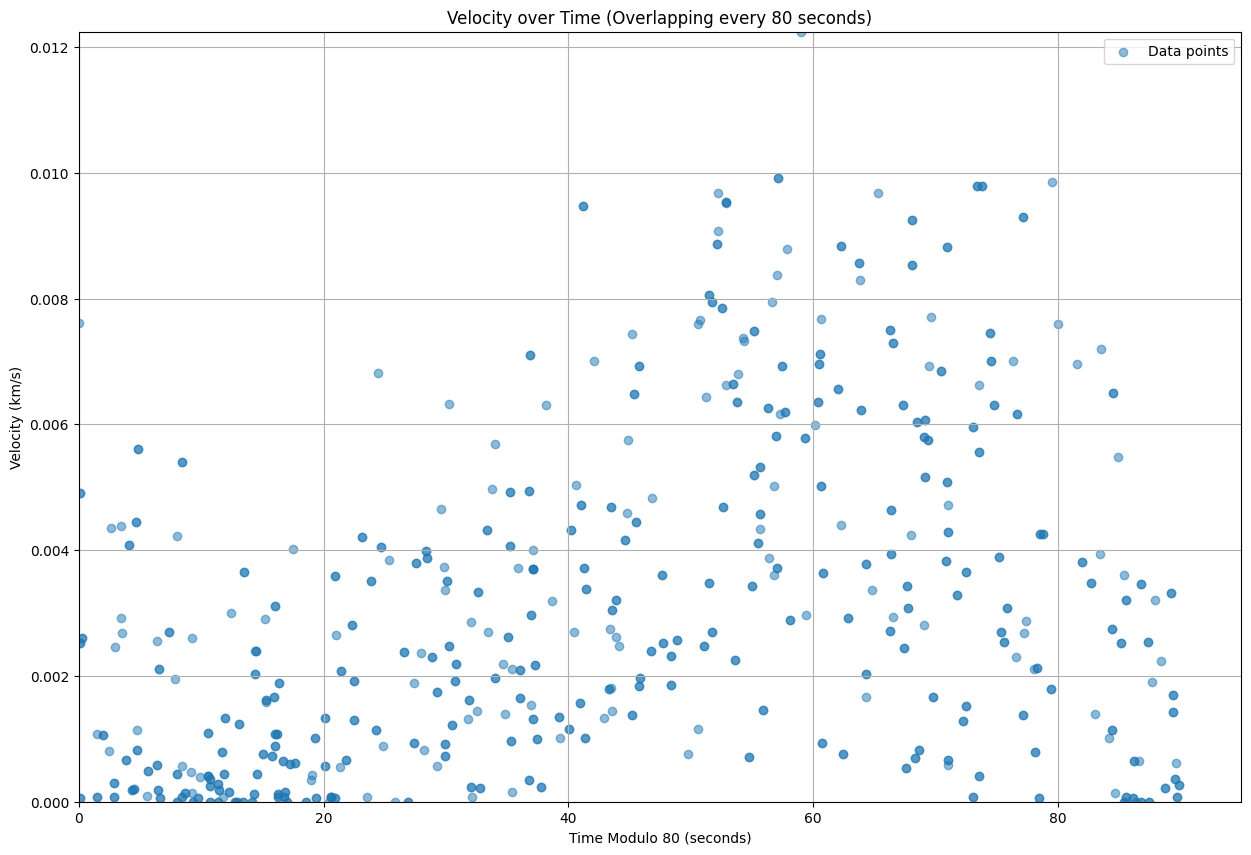

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


    # Apply modulo operation to wrap time around every period_T seconds
df_55['time_modulo'] = df_55['time_seconds'] % 90

    # Perform a linear regression on the wrapped data
m, b = np.polyfit(df_55['time_modulo'], df_55['velocity_kms'], 1)

    # Create a sequence of 1000 evenly spaced numbers from 0 to period_T for plotting the trend line
x = np.linspace(0, 3600, 1000)
y = m * x + b

    # Plotting
plt.figure(figsize=(15, 10))
plt.scatter(df_55['time_modulo'], df_55['velocity_kms'], alpha=0.5, label='Data points')

plt.title(f'Velocity over Time (Overlapping every {80} seconds)')
plt.xlabel(f'Time Modulo {80} (seconds)')
plt.ylabel('Velocity (km/s)')
plt.xlim(0, 95)  # Set x-axis limit to period_T seconds
plt.ylim(0, df_55['velocity_kms'].max())  # Set y-axis limit based on maximum velocity
plt.grid(True)
plt.legend()
plt.show()

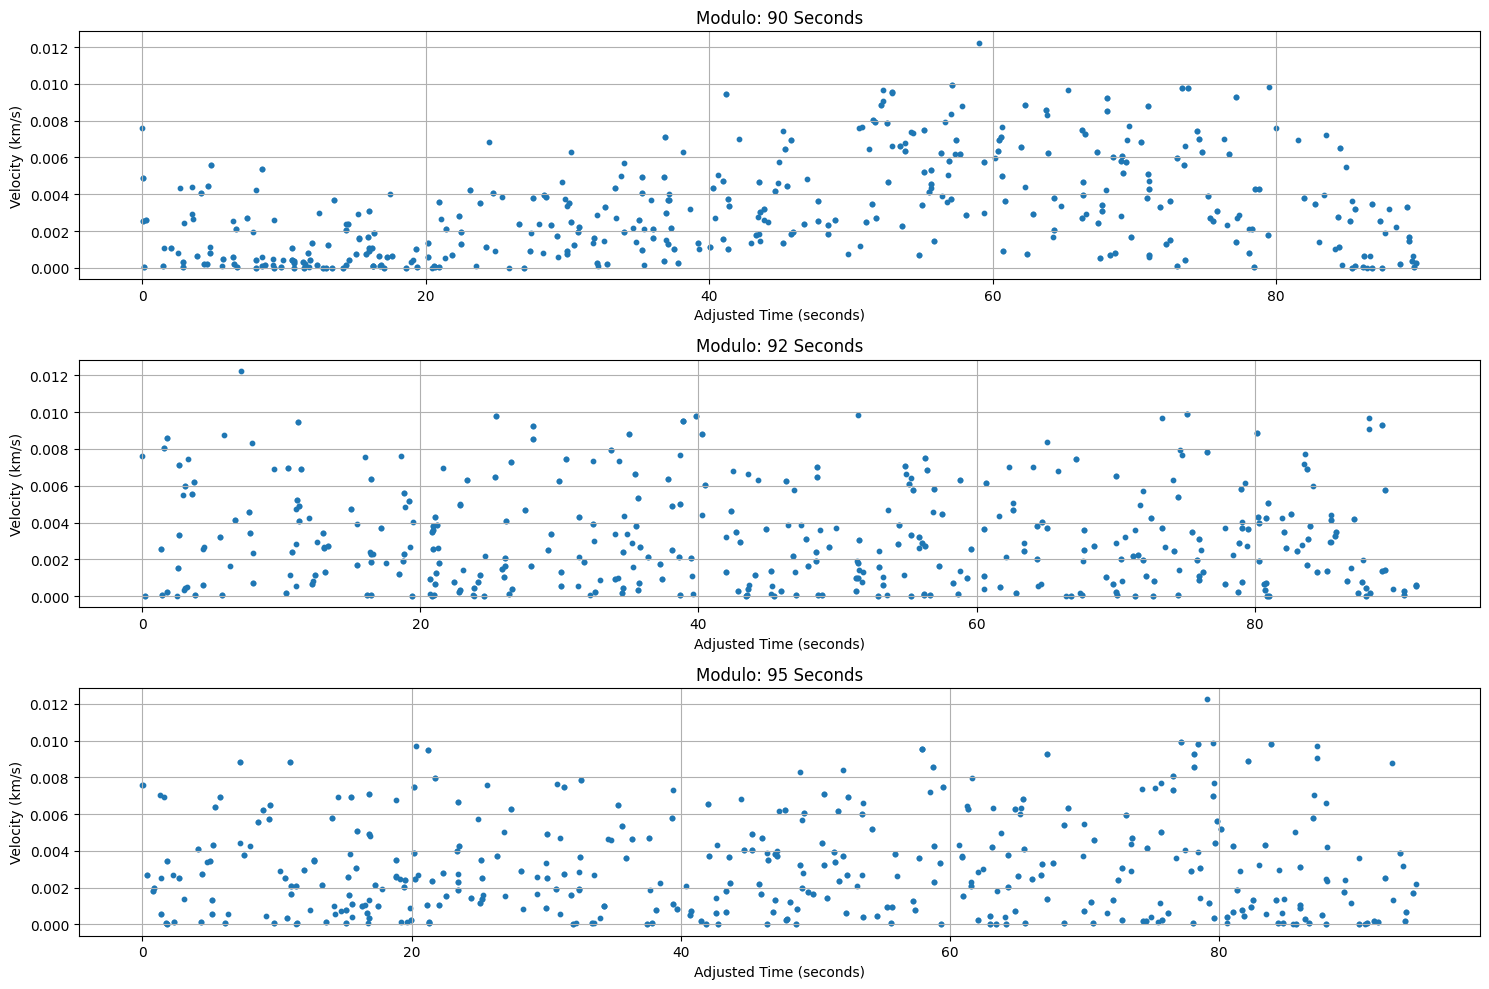

In [24]:
import matplotlib.pyplot as plt

def plot_modulo_adjusted_time(df, modulo_values):
    plt.figure(figsize=(15, 10))

    for i, mod in enumerate(modulo_values, 1):
        adjusted_time = df['time_seconds'] % mod
        plt.subplot(len(modulo_values), 1, i)
        plt.scatter(adjusted_time, df['velocity_kms'], s=10)
        plt.title(f'Modulo: {mod} Seconds')
        plt.xlabel('Adjusted Time (seconds)')
        plt.ylabel('Velocity (km/s)')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example modulo values to test
modulo_values = [90, 92, 95]  # 1 hour, 1 day, 1 week
plot_modulo_adjusted_time(df_55, modulo_values)


From the two intersection, we would like to say
90sec is the better modulo for the plot

Also, I have investigate the traffic signal from the intersection I choose, it is also near to 90sec.